In [1]:
# importando bilbiotecas.
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor, plot_importance, cv

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **1**- Explorando os dados.

Nesta sessão está contido todo o caminho para entender melhor e vizualizar as informações contidas no dataset.

In [2]:
#importando dados.
df= pd.read_csv('/content/drive/MyDrive/IHM/MiningProcess_Flotation_Plant_Database.csv',
                decimal=",",
                parse_dates=["date"],
                infer_datetime_format=True)

#vizualizando os dados.
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,295.096,306.400,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,295.096,306.400,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,295.096,306.400,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,295.096,306.400,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,295.096,306.400,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,299.920,299.623,346.794,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.710,300.465,330.023,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.590,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,299.372,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [ ]:
# Vizualizando o formato das informações.
print(df.info(),'\n=============================================================================')

# Checando se existe algum valor faltando.
print(df.isna().sum(),'\n======================================================================================')

# Vizualizando as colunas.
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

- Todas as colunas estão em formato float64(números racionais).

- Não existe números faltantes em nenhuma coluna.

In [ ]:
#fazendo uma breve analise das informações.
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


Foi informado que a frequência de algumas colunas eram captadas a cada 20 segundos. Ao analisar as datas cheguei a conclusão que era preciso ajustar os minutos para entender melhor as informações.

In [ ]:
qte_horas = df.groupby('date').count() # Agrupando por datas e contando valores agrupados.
qte_horas[qte_horas['% Silica Concentrate'] < 180] # Observando quantas datas tem valores menores que 180(1hora).

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
2017-04-10 00:00:00,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179


Apenas a primeira hora tem segundos faltantes

In [3]:
# Somando quantos valores únicos existem na coluna 'date'.
horas = pd.Series(df['date'].unique())
horas.index = horas
len(horas)


4097

In [4]:
# Criando um novo index para as datas contidas no dataset.
date_range = pd.date_range(start=df.iloc[0,0], end='2017-09-09 23:59:40', freq='20S')

# removendo as primeiras linhas para convergir com os segundos faltantes.
date_range = date_range[6:]
date_range[-5:]

DatetimeIndex(['2017-09-09 23:58:20', '2017-09-09 23:58:40',
               '2017-09-09 23:59:00', '2017-09-09 23:59:20',
               '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', freq='20S')

In [5]:
# Criando lista de segundos e horas para o novo index.
lista_horas = horas.index.format()
lista_segundos = date_range.format()

In [6]:
# Combinando o novo index com as horas.
novo_index = []
for idx in lista_segundos:
    if (idx[:13] + ':00:00') in lista_horas:
        novo_index.append(idx)

#Removendo a hora que tem dados faltantes.
novo_index.remove('2017-04-10 00:00:00')
novo_index[-20:]

['2017-09-09 23:53:20',
 '2017-09-09 23:53:40',
 '2017-09-09 23:54:00',
 '2017-09-09 23:54:20',
 '2017-09-09 23:54:40',
 '2017-09-09 23:55:00',
 '2017-09-09 23:55:20',
 '2017-09-09 23:55:40',
 '2017-09-09 23:56:00',
 '2017-09-09 23:56:20',
 '2017-09-09 23:56:40',
 '2017-09-09 23:57:00',
 '2017-09-09 23:57:20',
 '2017-09-09 23:57:40',
 '2017-09-09 23:58:00',
 '2017-09-09 23:58:20',
 '2017-09-09 23:58:40',
 '2017-09-09 23:59:00',
 '2017-09-09 23:59:20',
 '2017-09-09 23:59:40']

In [7]:
#Indexando ao dataframe.
df['index'] = novo_index
df['index'] = pd.to_datetime(df['index'])
df.index = df['index']
df = df.loc[:, df.columns[:-1]]
df.rename(columns={'date': 'data'}, inplace=True)
df

,data,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
index,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:02:00,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,295.096,306.400,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:02:20,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,295.096,306.400,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:02:40,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,295.096,306.400,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:03:00,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,295.096,306.400,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:03:20,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,295.096,306.400,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:58:20,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,299.920,299.623,346.794,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:58:40,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.710,300.465,330.023,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:59:00,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.590,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


# 2 - Vizualização

In [8]:
# Separando colunas por categoria.
tudo = [i for i in df.columns[1:25]] # todas exeto data
features = [i for i in df.columns[1:21]]  # todas as variáveis    
importantes = [i for i in df.columns[3:8]] # colunas que mais influenciam
fluxo_ar = [i for i in df.columns[8:15]] # Fluxo de ar
level_nomes = [i for i in df.columns[15:22]] # Level
target = ['% Silica Concentrate'] # objetivo final

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e369c3810>,
      dtype=object)

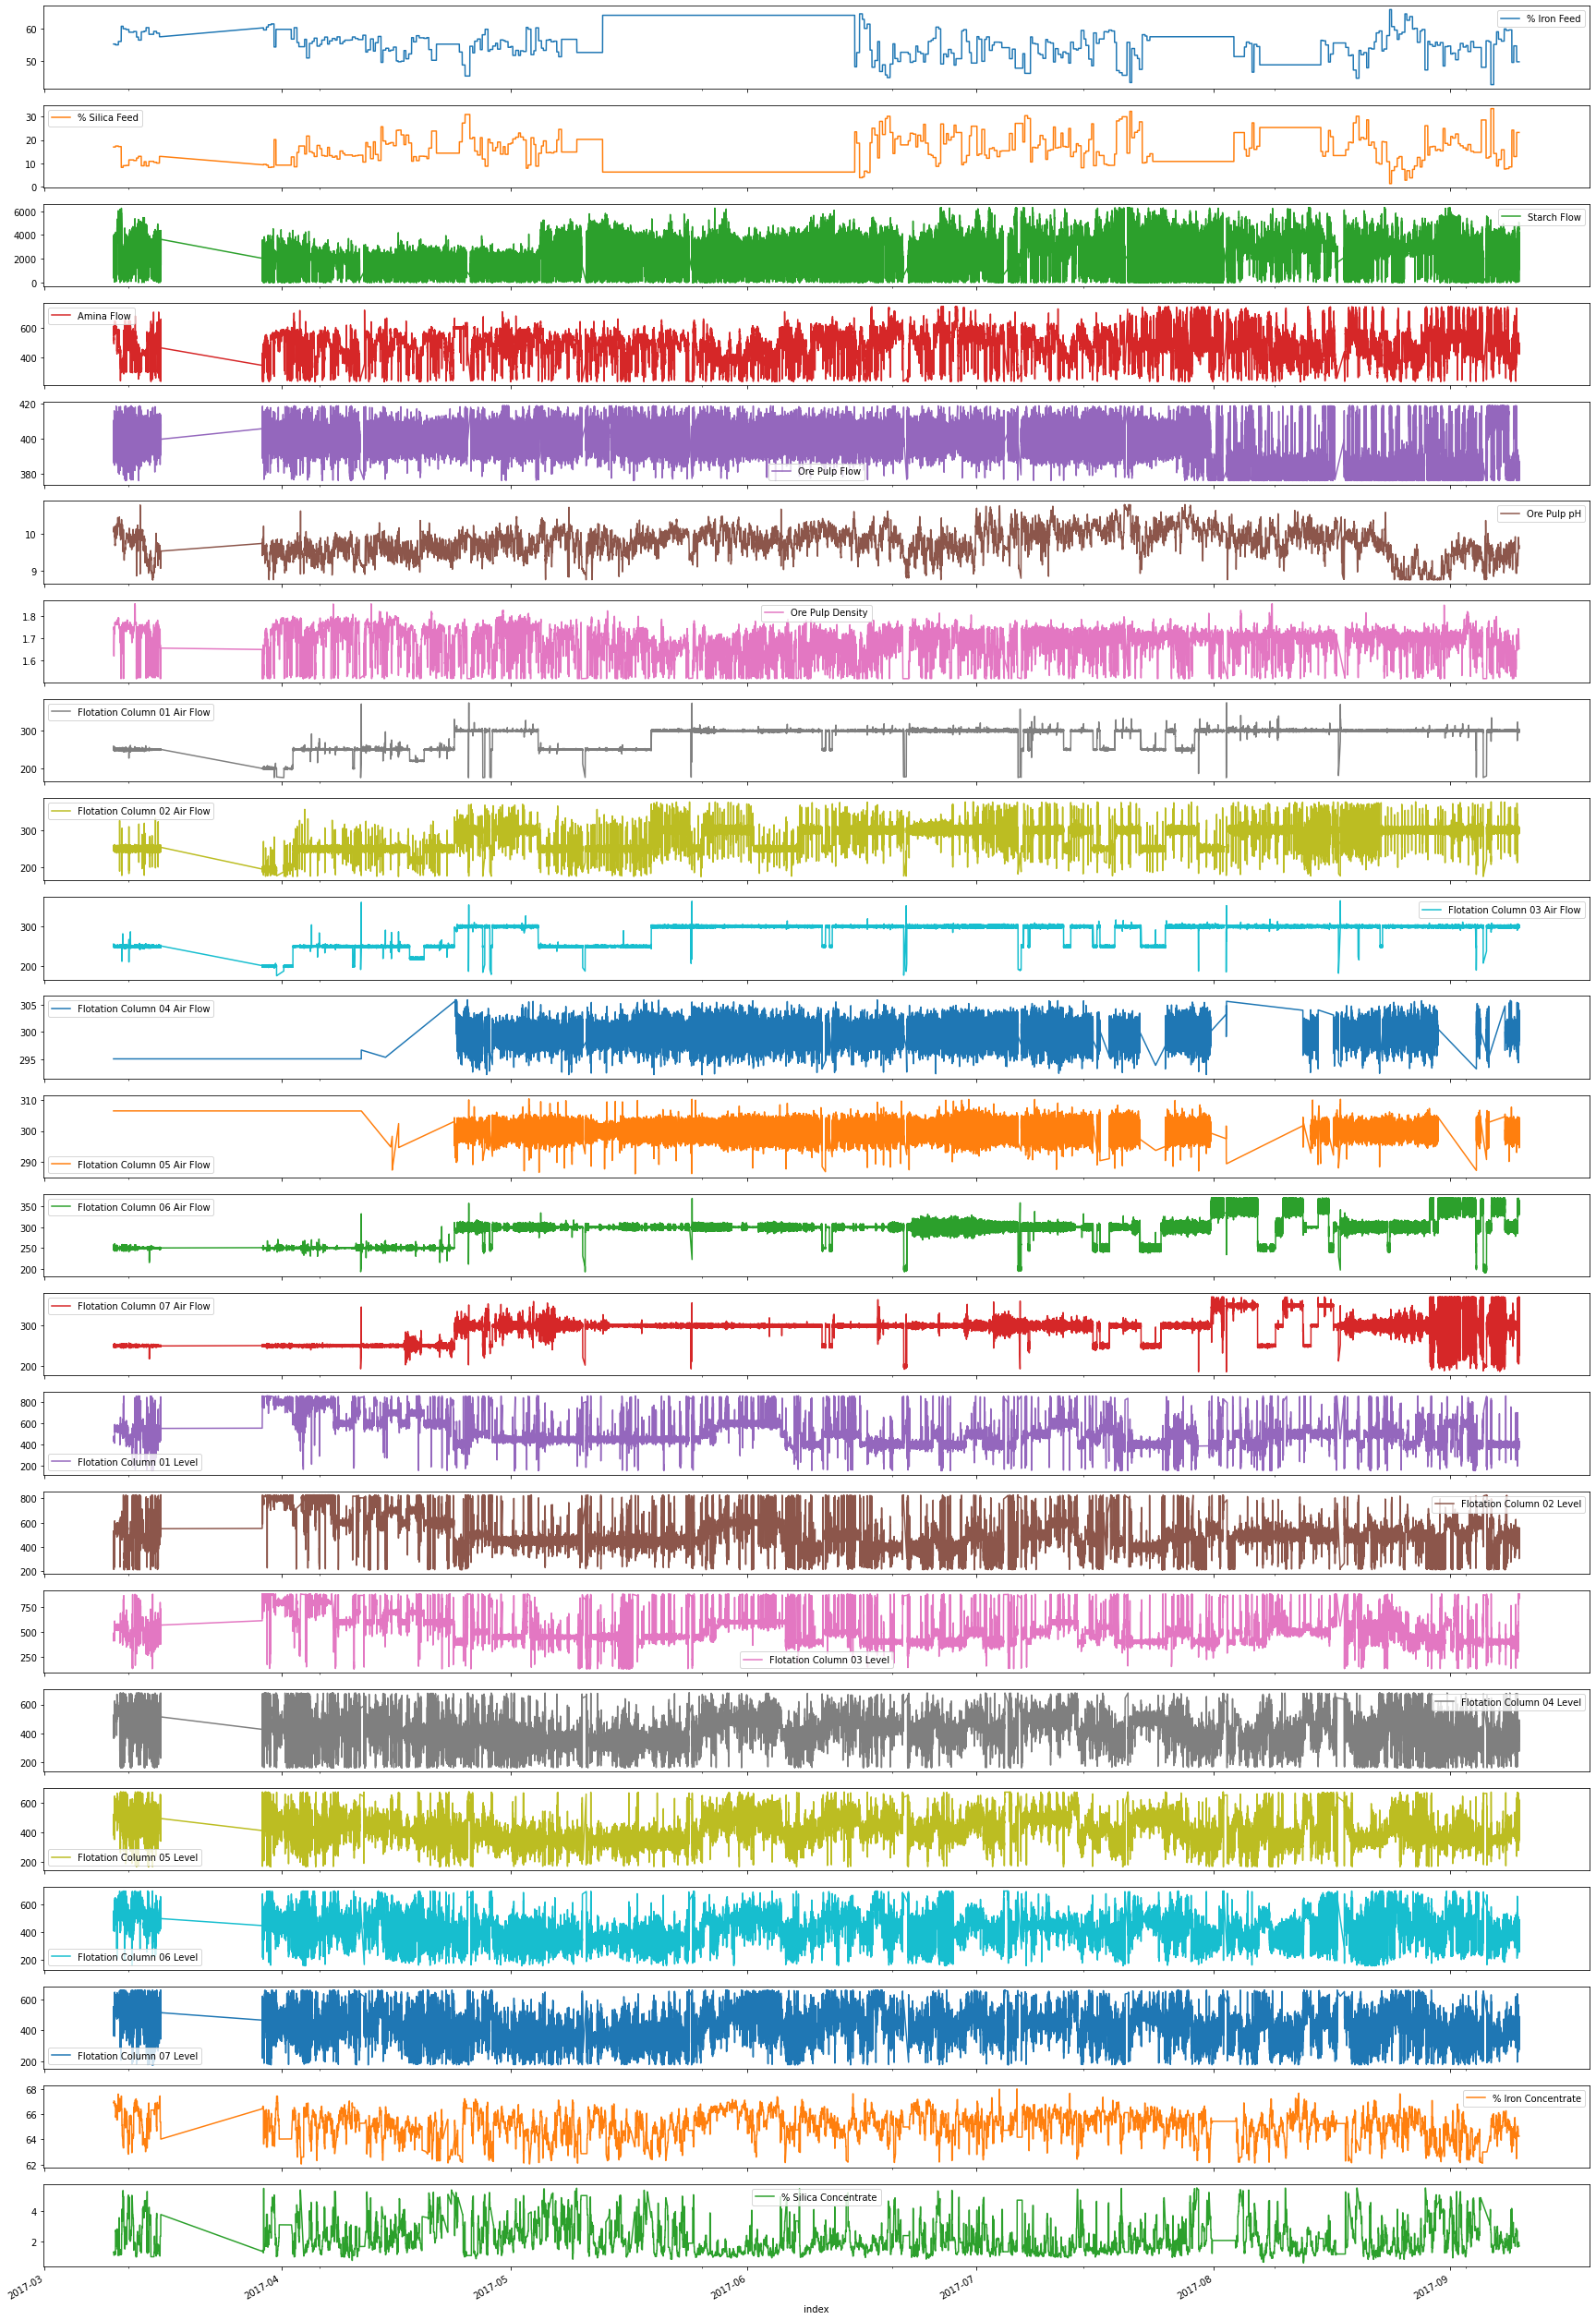

In [ ]:
#checando gráfico temporal.
df.sort_index('index')[tudo].plot(subplots=True,figsize=(30, 50)) 


1- As informações são mais confiáveis a partir do dia 17/03/2017, então decidi usar apenas a partir desta data para evitar dados errados.

2- % Iron feed e % Sílica feed tem padrões de volatilidade muito estranhos em relação as demais variáveis.



In [9]:
# Excluindo informações duvidosas.
df= df[(df['data'] >='2017-03-17')]

### 2.1 Decompondo da concentração de Sílica

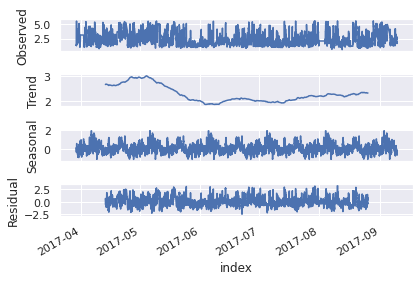

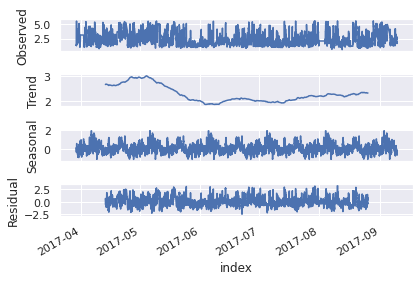

In [ ]:
#Observando se há tendência e/ou sazonalidade (30 dias).
sns.set(font_scale=1)
resultado = seasonal_decompose(df[target],model='additive',freq=129600)
resultado.plot()

Entendemos que:

1- O gráfico tem uma tendência.

2- Segue um padrão de sazonalidade.

3- Tem bastente ruído.

Conclusão: Por não ter dados de pelo menos 1 ano optei por não seguir em frente com modelos de forecast como ARIMA/LSTM/Prophet.

### 2.2 Interpolação

In [ ]:
# Contando soma de valores únicos.
print(df['% Iron Feed'].value_counts())
print(df['% Silica Feed'].value_counts())

48.810000    34560
55.170000    12960
59.720000     8640
55.530000     7020
51.340000     5940
             ...  
53.733168        1
48.613181        1
56.278234        1
51.645791        1
52.236109        1
Name: % Iron Feed, Length: 213018, dtype: int64
25.310000    34560
14.350000    12960
13.320000     8640
9.220000      8640
23.160000     5940
             ...  
14.820327        1
24.124942        1
24.265136        1
24.326109        1
24.080766        1
Name: % Silica Feed, Length: 211953, dtype: int64


In [10]:
# Excluindo valores.
df['% Iron Feed'] = df['% Iron Feed'].replace([64.03,57.46,52.61,56.65], np.NaN)
df['% Silica Feed'] = df['% Silica Feed'].replace([6.26,10.80,20.24,14.83], np.NaN)

In [11]:
# Interpolando as colunas Iron e Silica feed.
df['% Iron Feed'] = df['% Iron Feed'].interpolate()
df['% Silica Feed'] = df['% Silica Feed'].interpolate()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f57ca6e4e10>,
      dtype=object)

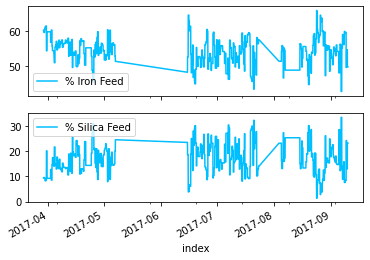

In [ ]:
# Resultado da interpolação.
df[['% Iron Feed','% Silica Feed']].plot(subplots=True,color='deepskyblue')

Como podemos observar no primeiro gráfico temporal, as colunas  estavam com valores duvidosos entre a primeira semana de Maio até metade de Julho. Então resolvi fazer uma interpolação para deixar os valores o mais próximos da média possível, sem que eles se repitam.

### 2.3 Checando outliers

IndexError: ignored

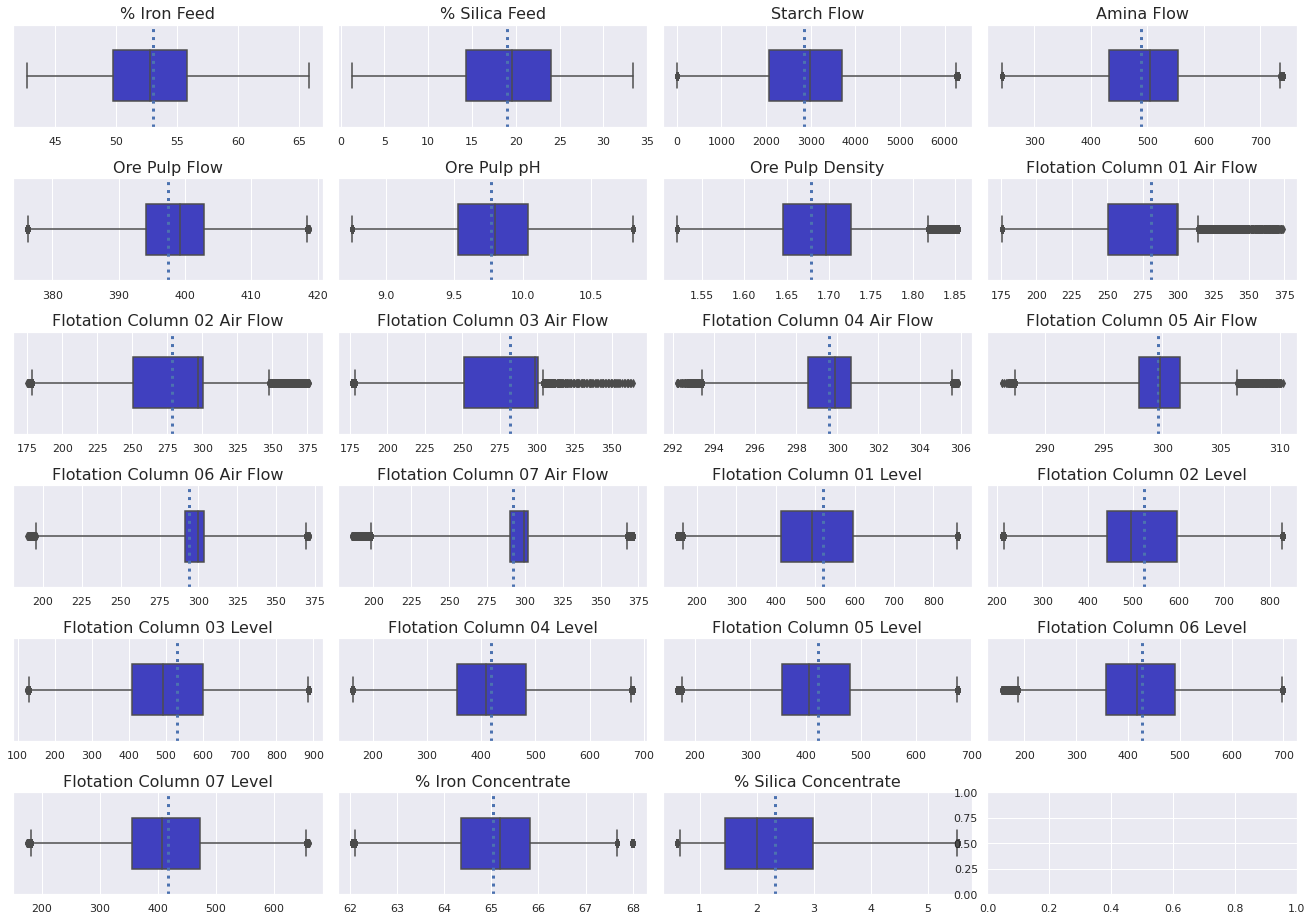

In [ ]:
#checando Outliers.
fig = plt.figure(figsize=(23,16))
grid =  gridspec.GridSpec(6,4,figure=fig,hspace=.5,wspace=.05)
counter = 0

for i in range(6):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[tudo[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.axvline(df[tudo[counter]].mean(), label='Mean', linestyle=':',linewidth=3)
        subf.set_xlabel('')
        subf.set_title('{}'.format(tudo[counter]),fontsize=16)
        counter += 1
plt.show();

Apesar de nenhuma feature existir números muito distoantes, optei por excluir os 0,01% quantis para evitar outliers.

In [12]:
# Removendo outliers pelo quantil(IQR).

Q1 = df[tudo].quantile(0.01)
Q3 = df[tudo].quantile(0.99)
IQR = Q3 - Q1

df = df[~((df[tudo] < (Q1 - 1.5 * IQR)) |(df[tudo] > (Q3 + 1.5 * IQR))).any(axis=1)]

### 2.4 Distribuição dos dados

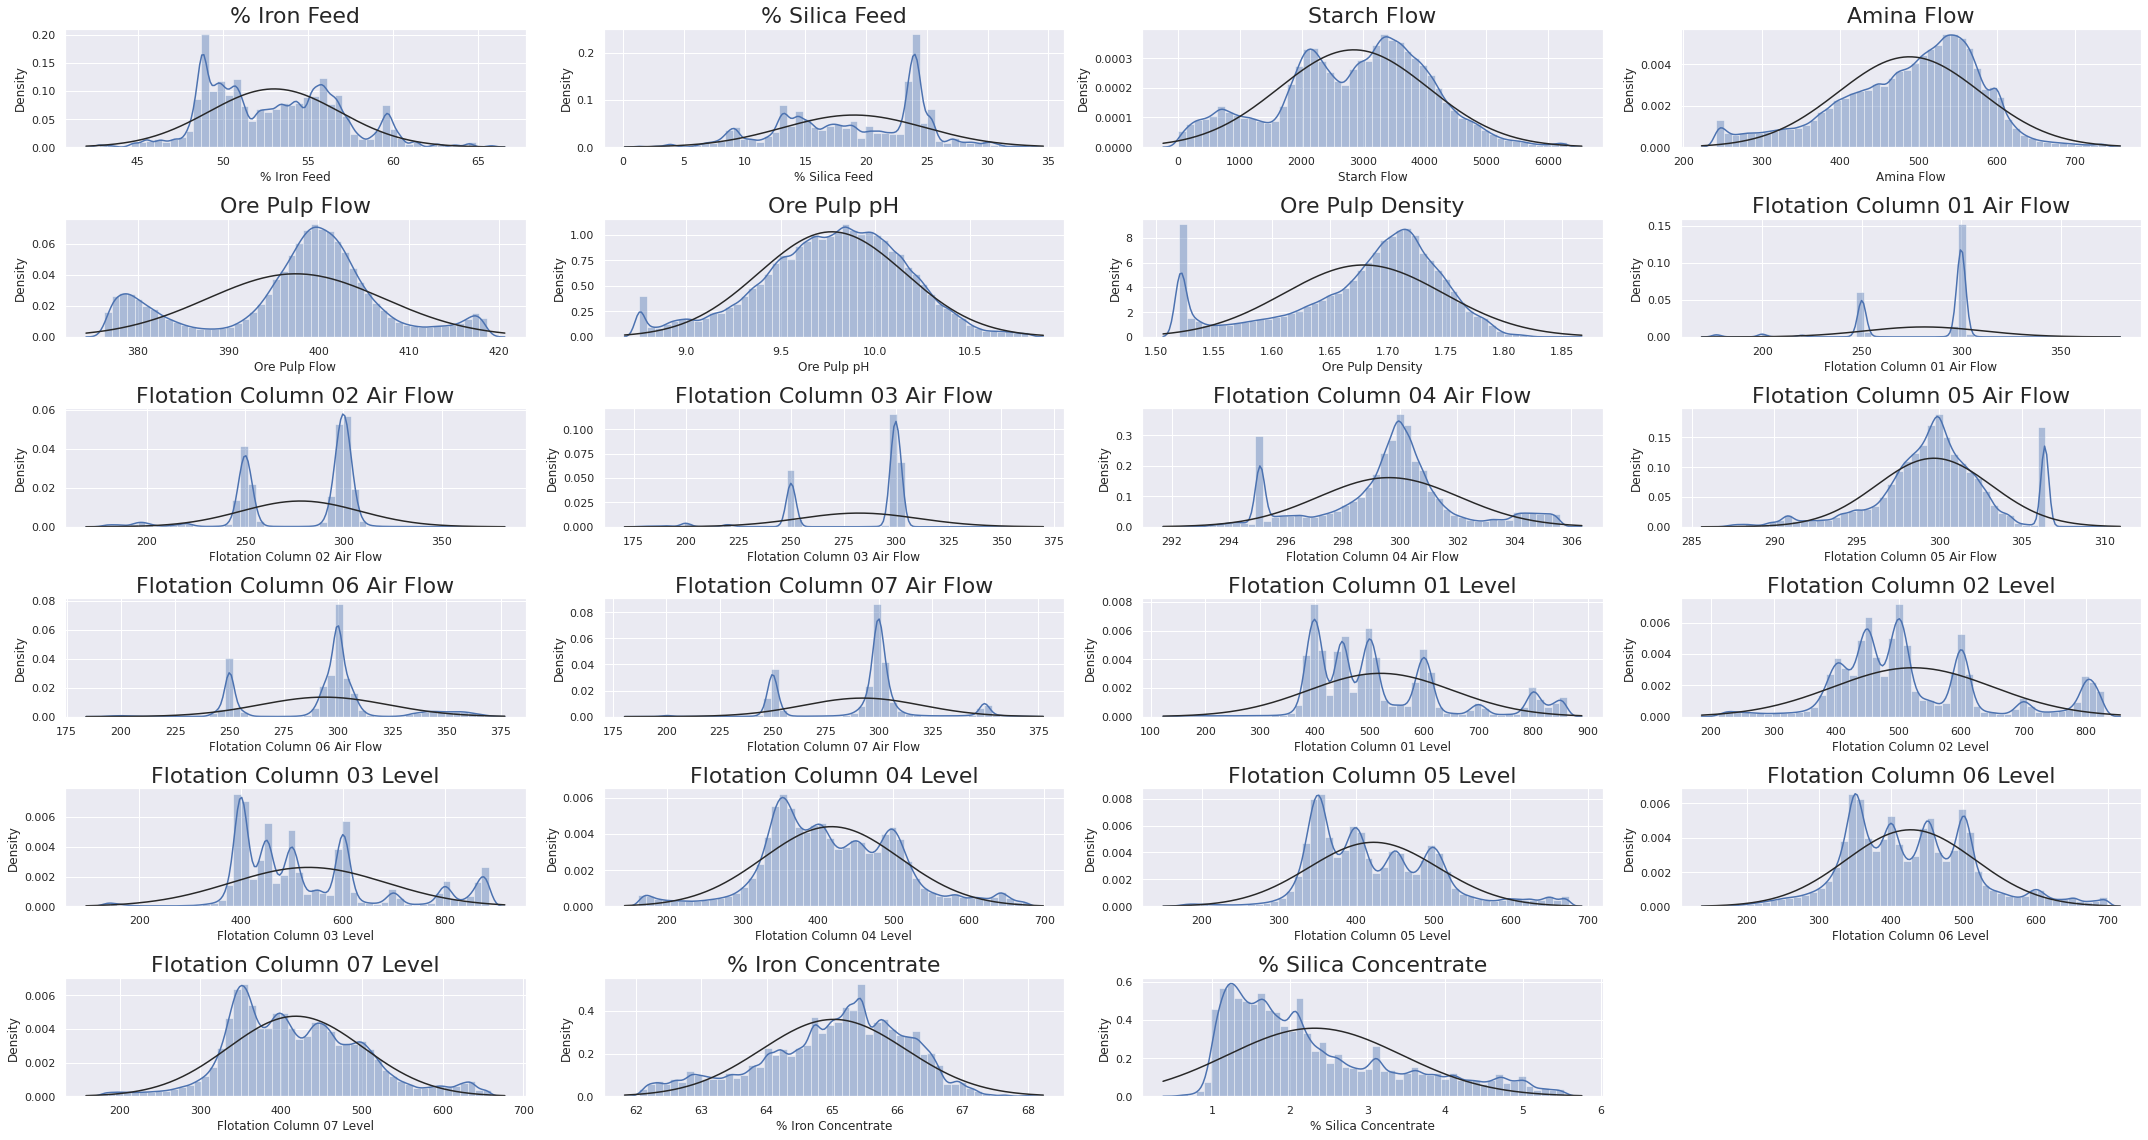

In [ ]:
# Gráfico das distribuições.
plt.figure(figsize = (30,16))
for ax, col in enumerate(tudo):
    plt.subplot(6,4, ax + 1)
    plt.title(col,fontsize=22)
    sns.distplot(df[col],fit=norm)
plt.tight_layout()


Podemos observar que muitas das variáveis tem distribuição assimétrica, apesar de muitas tentativas e métodos(log,raiz,box-cox,MinMax scaler) para resolver esse problema sem obter sucesso, resolvi aplicar o StandardScaler em todo o dataframe para facilitar no PCA/algorítmo.




### 2.5 Correlações

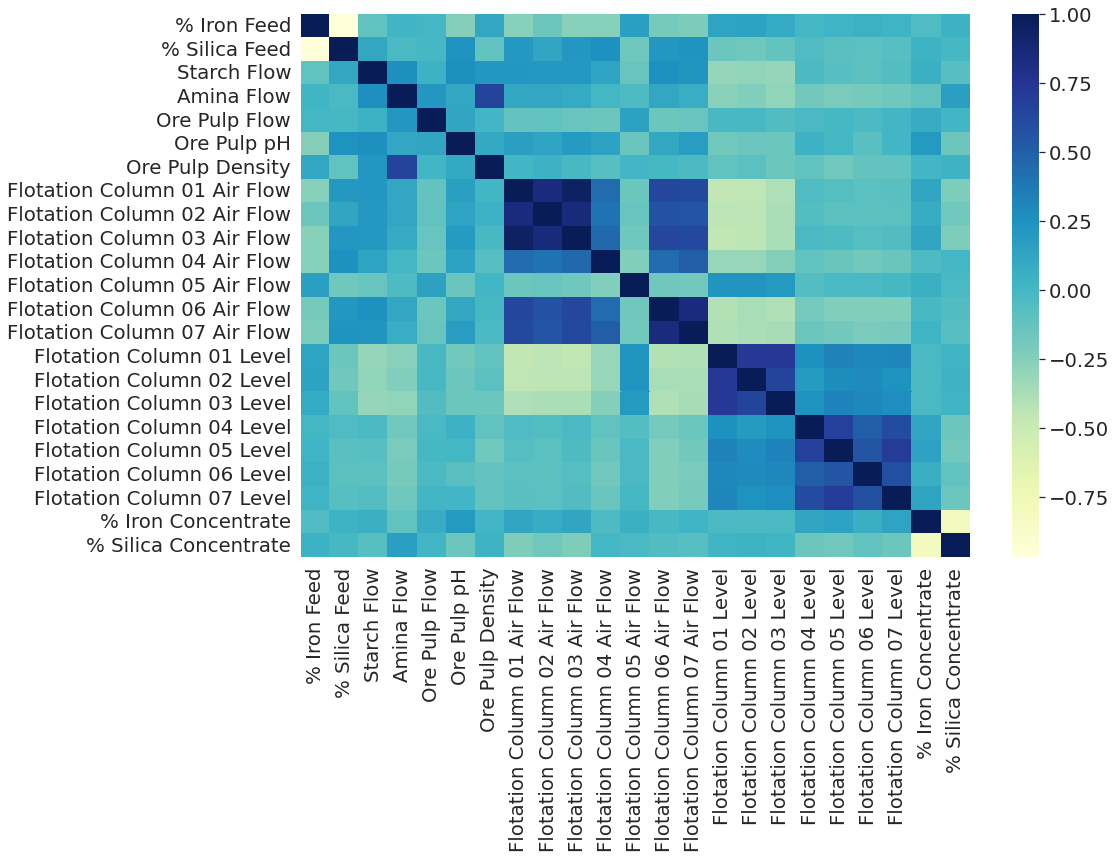

In [ ]:
# Gráfico de correlações.
sns.set(font_scale=1.8)
corr = df.corr()
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1,1,1)
sns.heatmap(corr,ax= ax,cmap="YlGnBu");

Com o gráfico de correlação podemos observar primeiramente que:

1- As variáveis Iron feed e sílica Feed são altamente correlacionadas, porem, sozinhas apatentam não ter muito impacto na concentração de ferro e sílica final.

2- Como esperado, as colunas de fluxo de ar e Flotação são altamente correlacionadas entre si.

3- Existe também uma relação inversa no produto final(Iron e sílica concentrate).


# 3- PCA

Visto que as features de ar e level existe grande correlação, optei por fazer PCA para diminuir a dimensão das variáveis, assim, diminuindo a necessidade de poder computacional, tornando o modelo mais rápido para treinar e fazer previsões.

In [13]:
# Separando o dataframe.
tudo_df = df.iloc[:,1:25]
imp = df.iloc[:,3:8]
ar = df.iloc[:,8:15]
level = df.iloc[:,15:22]

### 3.1 Padronização

In [14]:
padronizador = StandardScaler()

In [15]:
# Ajustando todo o dataframe.
padronizador.fit(tudo_df)

StandardScaler()

In [16]:
# Padronizando todo o dataframe.
tudo_df = pd.DataFrame(padronizador.transform(tudo_df))
tudo_df.columns = tudo

In [17]:
# Ajustando as colunas ar e level.
padronizador.fit(ar,level)

StandardScaler()

In [18]:
# Padronizando as colunas ar e level.
ar_pca = pd.DataFrame(padronizador.transform(ar))
ar_pca.columns = fluxo_ar

level_pca = pd.DataFrame(padronizador.transform(level))
level_pca.columns = level_nomes

In [19]:
# Aplicando PCA.
pca1 =  PCA(n_components= 3).fit(ar_pca)
pca2 = PCA(n_components= 2).fit(level_pca)

In [20]:
# Padronizando o PCA.
ar_pca = pd.DataFrame(pca1.transform(ar_pca))
level_pca = pd.DataFrame(pca2.transform(level_pca))

In [21]:
# Renomeando.
ar_pca.columns = ['ar1','ar2','ar3']
level_pca.columns = ['level1','level2']

In [22]:
# checando importância das colunas.
print('A variancia do PCA ar é:',pca1.explained_variance_ratio_)
print('A variancia do PCA level é:',pca2.explained_variance_ratio_)

A variancia do PCA ar é: [0.60644458 0.14457625 0.10834652]
A variancia do PCA level é: [0.83932543 0.12609024]


In [23]:
# Unindo todas as colunas.
pca_completo = pd.concat([ar_pca,level_pca],axis=1)

In [24]:
# Excluindo as colunas de ar e level do df e resetando o index.
tudo_df.drop(columns=fluxo_ar,inplace=True)
tudo_df.drop(columns=level_nomes,inplace=True)
tudo_df.reset_index(drop=True,inplace=True)

In [25]:
# Unindo o dataframe e o PCA.
tudo_df = pd.concat([tudo_df,pca_completo],axis=1,)

# 4- Modelo

Após realizar uma rápida comparação de modelos utilizando AutoML, opitei pelo XGboost pois foi o algoritimo que se destacou nas comparações, tendo uma MAPE mais baixa

### 4.1 Dividindo entre treino e teste.

In [26]:
# Separando objetivo e excluindo Iron concentrate.
y = tudo_df['% Silica Concentrate']
X = tudo_df.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

In [27]:
# Dvividindo em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checando tamanhos.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(568511, 12)
(142128, 12)
(568511,)
(142128,)


### 4.2 Criando o modelo

In [28]:
# Criando modelo com hiperparâmetros.
xgb_model = XGBRegressor(learning_rate=0.08, # Taxa de aprendizagem
                                 n_estimators=1300, # Número de árvores
                                 max_depth=6, # Profundidade
                                 min_child_weight=1,
                                 subsample=0.75,
                                 colsample_bynode=0.5,
                                 random_state=0,
                                 gpu_id='0',
                                 tree_method='gpu_hist',
                                 num_parallel_tree=3,
                                 booster="gbtree
                                 )

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(colsample_bynode=0.5, gpu_id='0', learning_rate=0.08, max_depth=6,
             n_estimators=1300, num_parallel_tree=3,
             objective='reg:squarederror', subsample=0.75,
             tree_method='gpu_hist')

### 4.3 Avaliando

In [ ]:
predict = xgb_model.predict(X_test)

In [ ]:
print('A média percentual absoluta é:',mean_absolute_percentage_error(y_test, predict))

A média percentual absoluta é: 1.0686002463785933


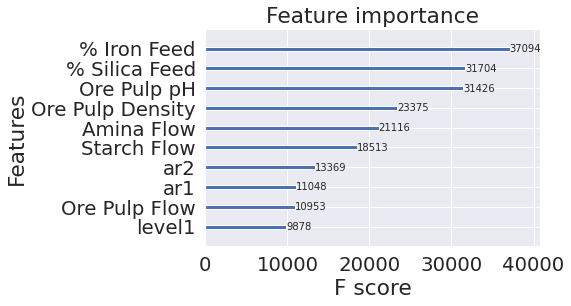

In [ ]:
# top 10 Features mais importantes.
plot_importance(xgb_model, max_num_features=10) 
plt.show()

In [ ]:
#Plotando as relações entre as variáveis mais importantes.
df_sample = df.sample(n=1000)

fig = px.scatter(df_sample, x = '% Iron Feed', y = '% Silica Concentrate', width = 800)
fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))

#fig = px.scatter(df_sample, x = '% Silica Feed', y = '% Silica Concentrate', width = 800)
#fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))

#fig = px.scatter(df_sample, x = 'Ore Pulp pH', y = '% Silica Concentrate', width = 800)
#fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))

#fig = px.scatter(df_sample, x = 'Ore Pulp Density', y = '% Silica Concentrate', width = 800)
#fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))

In [ ]:
df.columns

Index(['data', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [30]:
#instalando sv
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.6 MB/s 


In [31]:
#importando sv
import sweetviz as sv

In [32]:
#gerando relatório
my_report = sv.analyze(df, target_feat= '% Silica Concentrate')

                                             |          | [  0%]   00:00 -> (? left)

In [33]:
# Exportando relatório
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 5- Conclusões

1- Gráfico com tendência e sazonalidade, porém necessita de mais ciclos.

2- A Densidade e o PH da pasta de minério de ferro são farotes determinantes que poderiam ser manipulados para Melhorar o resultado.

3- Nota-se uma queda considerável a partir da chegada do inverno (Temperatura pode ser um fator importante).
